## Model Training
- Multiple Linear Regression
- Lasso's Regression (L1 regularization technique)
- CV Lasso's Regression 
- Ridge Regression (L2 regularization technique)
- CV Ridge Regression
- Elastic Net Regression
- CV Elastic Net Regression<br> 
### Following Machine Learning algorithms  will be used and based on accuracy, model will be selected

In [1]:
## Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
## Reading DataSet
df = pd.read_csv(r"C:\Users\Er_luciferR.LUC\Downloads\Py-Codes\DS_june_23\ML Projects\Linear Regression (Algerian Forest Fires Dataset)\Algerian_forest_fires_dataset_CLEANED.csv")

In [3]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [5]:
## Dropping DateTime
df = df.drop(['day','month','year'], axis=1)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
## Logic for Dependent and Independent feature separation
x = {i for i in df.columns if i != 'FWI'}

In [8]:
x

{'BUI',
 'Classes',
 'DC',
 'DMC',
 'FFMC',
 'ISI',
 'RH',
 'Rain',
 'Region',
 'Temperature',
 'Ws'}

In [9]:
## Dividing DataSet into input and output features
X = df.drop({i for i in df.columns if i == 'FWI'}, axis=1)
y = df.drop({i for i in df.columns if i != 'FWI'}, axis=1)

In [10]:
X.shape,y.shape

((243, 11), (243, 1))

In [11]:
y.head()

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   Classes      243 non-null    int64  
 10  Region       243 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 21.0 KB


In [13]:
## Test-Train Split 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25 , random_state=42)

In [14]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((182, 11), (61, 11), (182, 1), (61, 1))

### Multicollinearity Test

In [15]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot:>

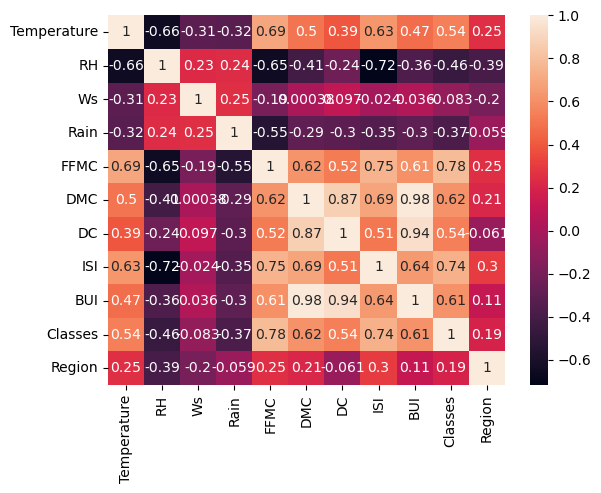

In [16]:
sns.heatmap(X_train.corr(),annot=True)

In [17]:
## Check for multicollinearity
## Function For finding feature having correlation higher than threshold
def corrr(df , thresh):
    c_c = set()
    data = df.corr()
    for i in range(len(data.columns)):
        for j in range(i):
            if abs(data.iloc[i,j]) > thresh:
                col_name = data.columns[i]
                c_c.add(col_name)
    return c_c
         

In [18]:
corrr(X_train , 0.85)

{'BUI', 'DC'}

In [19]:
## Dropping highly correlated features 

In [20]:
X_train.drop(corrr(X_train , 0.85), axis = 1 , inplace = True)
X_test.drop(corrr(X_test , 0.85), axis = 1 , inplace = True)

In [21]:
y_test

,FWI
24,8.4
6,7.2
152,0.5
232,3.8
238,6.5
...,...
162,0.8
178,9.0
224,3.9
230,15.4


In [22]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


## Feature Scaling

In [23]:
## Standarizing Data set by applying Zscore 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled.shape

(182, 9)

## Box Plots To understand Effect Of Standard Scaler

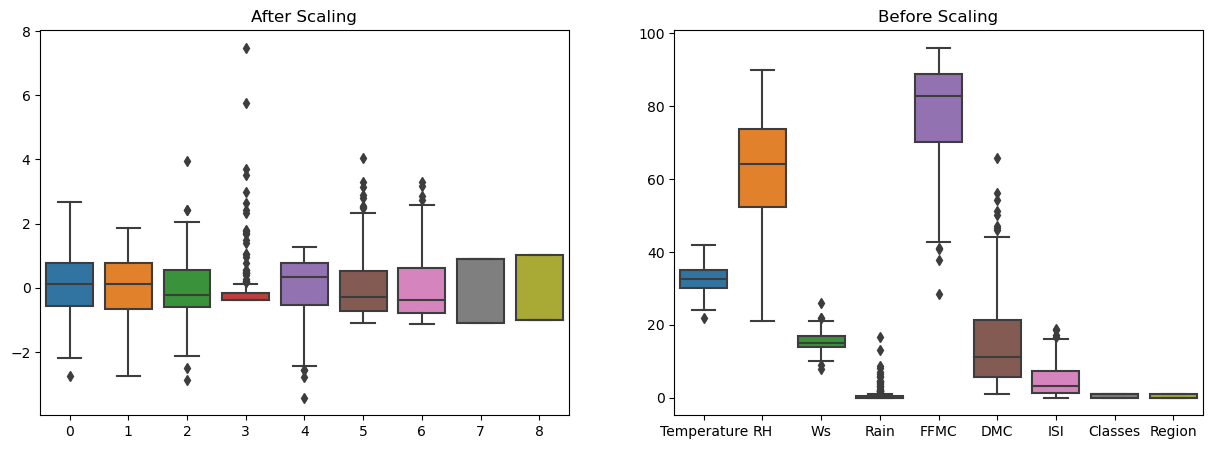

In [25]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('After Scaling')
sns.boxplot(data = X_train_scaled )
plt.subplot(1,2,2)
plt.title("Before Scaling")
sns.boxplot(data = X_train )
plt.show()

# Applying Machine Learning Models

## Linear Regression Model

0.5468236465249986
0.9847657384266951


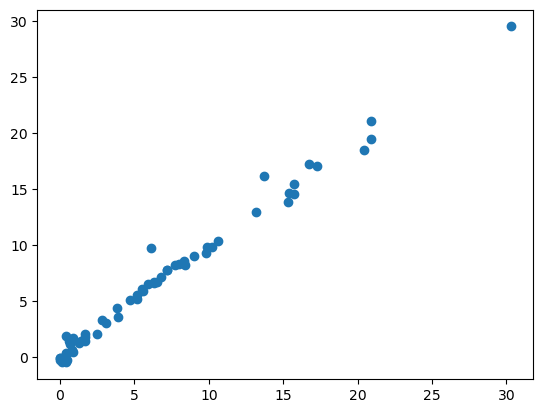

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
r2 = r2_score(y_test,y_pred)
print(mae)
print(r2)
plt.scatter(y_test , y_pred)

## Lasso's Regression Model

1.1331759949144085
0.9492020263112388


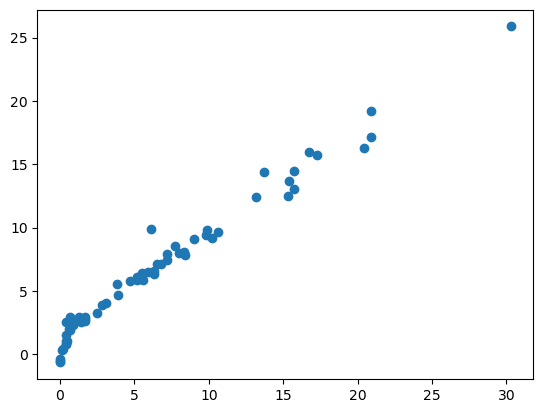

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 =  r2_score(y_test,y_pred)
print(mae)
print(r2)
plt.scatter(y_test,y_pred)

## Cross Validation Lasso's

0.6199701158263436
0.9820946715928275


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


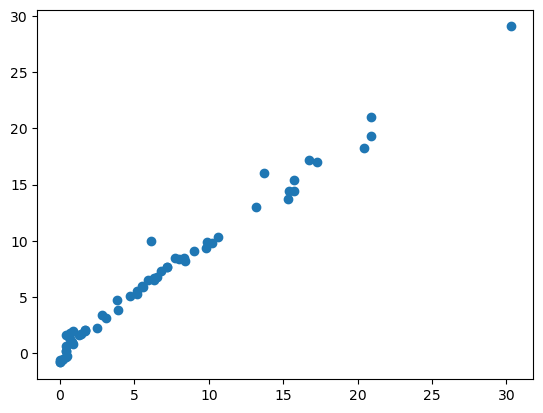

In [32]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mae)
print(r2)
plt.scatter(y_test,y_pred)

## Rigde Regression Model

0.5642305340105719
0.9842993364555513


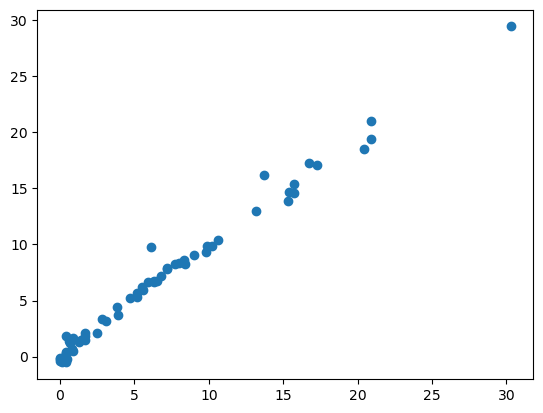

In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mae)
print(r2)
plt.scatter(y_test,y_pred)

## Cross Validation Ridge

0.5642305340105719
0.9842993364555513


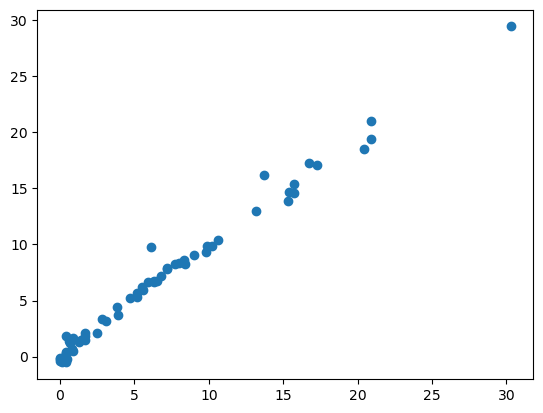

In [34]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mae)
print(r2)
plt.scatter(y_test,y_pred)

In [35]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': array([ 0.1,  1. , 10. ]),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

## Elastic Net Regression Model

1.8822353634896
0.8753460589519703


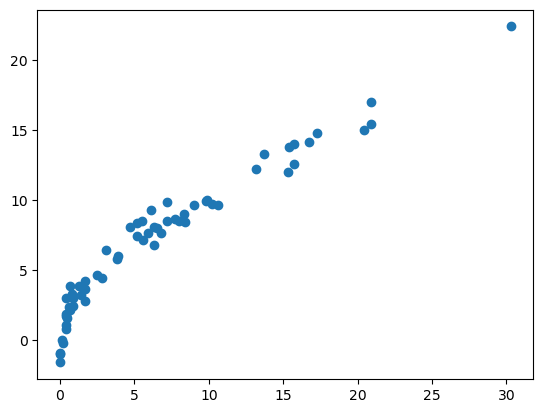

In [36]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mae)
print(r2)
plt.scatter(y_test,y_pred)

## Cross Validation Elastic Net

0.5962055131712254
0.9833958708830018


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


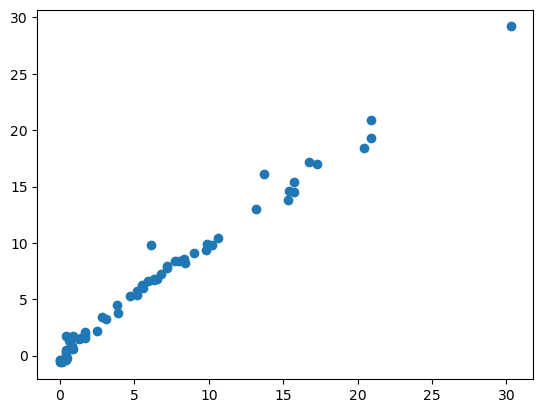

In [43]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=6)
elasticcv.fit(X_train_scaled,y_train)
y_pred = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mae)
print(r2)
plt.scatter(y_test,y_pred)

## Result of Model Training

| <h4>Machine Learning Model                      |<h4>Accuracy  |
|-------------------------------------------------|--------------|
|Multiple Linear Regression                       |   98.47%     |
|Lasso's Regression (L1 regularization technique) |   94.92%     |
|CV Lasso's Regression                            |   98.20%     |
|`Ridge Regression (L2 regularization technique)`  |  ` 98.42% `    |
|CV Ridge Regression                              |   98.42%     |
|Elastic Net Regression                           |   87.53%     |
|CV Elastic Net Regression                        |   98.33%     |
    
    
<br> I got highest accuracy for `Ridge Regression`

In [46]:
## Pickling The model and Scalar 
ridge

Ridge()

In [47]:
scaler

StandardScaler()

In [48]:
import pickle
pickle.dump(scaler,open('scaler.pkl' , 'wb'))
pickle.dump(ridge , open('ridge.pkl' , 'wb'))

In [49]:
X_train.columns


Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')